In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import DataFrame

In [2]:
df_ratings: DataFrame = pd.read_csv("../unprocessed-data/ratings.csv", encoding="utf-8")

df_ratings.head(5)

# Todas as colunas de df_ratings são importantes

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

In [3]:
df_ratings.shape

(1149780, 3)

In [4]:
df_ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

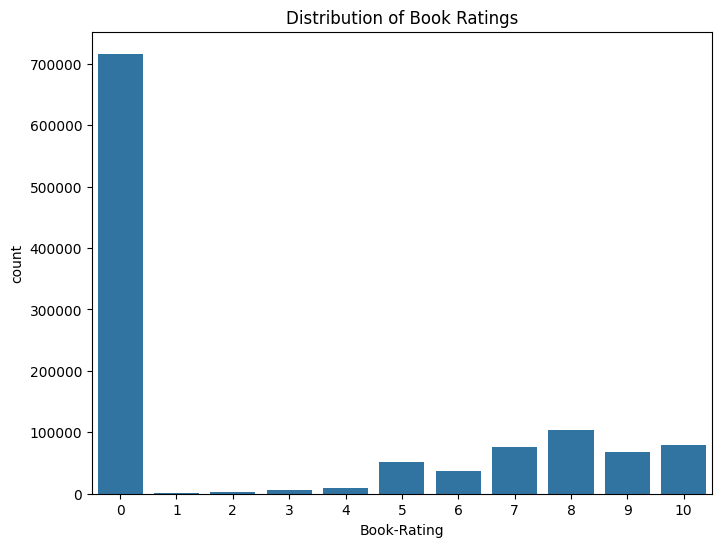

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_ratings, x="Book-Rating")
plt.title("Distribution of Book Ratings")
plt.show()

In [6]:
df_ratings: DataFrame = df_ratings[df_ratings["Book-Rating"] != 0]

df_ratings

User-ID         ISBN  Book-Rating
1         276726   0155061224            5
3         276729   052165615X            3
4         276729   0521795028            6
6         276736   3257224281            8
7         276737   0600570967            6
...          ...          ...          ...
1149773   276704   0806917695            5
1149775   276704   1563526298            9
1149777   276709   0515107662           10
1149778   276721   0590442449           10
1149779   276723  05162443314            8

[433671 rows x 3 columns]

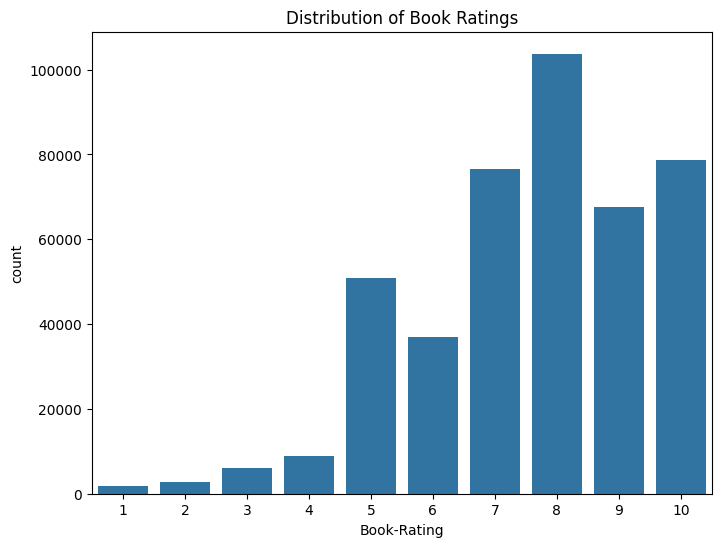

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_ratings, x="Book-Rating")
plt.title("Distribution of Book Ratings")
plt.show()

In [8]:
df_books: DataFrame = pd.read_csv("../unprocessed-data/books.csv", encoding="utf-8", low_memory=False)

df_books.head()


ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [9]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [10]:
df_books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [11]:
df_books["Book-Author"] = df_books["Book-Author"].fillna("Unknown Author")
df_books["Publisher"] = df_books["Publisher"].fillna("Unknown Publisher")

In [12]:
df_books["Year-Of-Publication"] = pd.to_numeric(df_books["Year-Of-Publication"], errors="coerce")

In [13]:
df_books.isna().sum()
df_books: DataFrame = df_books.dropna(subset=["Year-Of-Publication"])

In [14]:
df_users: DataFrame = pd.read_csv("../unprocessed-data/users.csv")

df_users.head()

User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN

In [15]:
df_users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [16]:
df_users: DataFrame = df_users.drop(columns="Age")

In [17]:
df_users.head()

User-ID                            Location
0        1                  nyc, new york, usa
1        2           stockton, california, usa
2        3     moscow, yukon territory, russia
3        4           porto, v.n.gaia, portugal
4        5  farnborough, hants, united kingdom

In [18]:
df_books_rating: DataFrame = df_ratings.merge(df_books, on="ISBN", how="inner")

df_books_rating.head()

User-ID        ISBN  Book-Rating  \
0   276726  0155061224            5   
1   276729  052165615X            3   
2   276729  0521795028            6   
3   276744  038550120X            7   
4   276747  0060517794            9   

                                          Book-Title    Book-Author  \
0                                   Rites of Passage     Judith Rae   
1                                     Help!: Level 1  Philip Prowse   
2  The Amsterdam Connection : Level 4 (Cambridge ...    Sue Leather   
3                                    A Painted House   JOHN GRISHAM   
4                           Little Altars Everywhere  Rebecca Wells   

   Year-Of-Publication                   Publisher  \
0               2001.0                      Heinle   
1               1999.0  Cambridge University Press   
2               2001.0  Cambridge University Press   
3               2001.0                   Doubleday   
4               2003.0                 HarperTorch   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0155061224.0...   
1  http://images.amazon.com/images/P/052165615X.0...   
2  http://images.amazon.com/images/P/0521795028.0...   
3  http://images.amazon.com/images/P/038550120X.0...   
4  http://images.amazon.com/images/P/0060517794.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0155061224.0...   
1  http://images.amazon.com/images/P/052165615X.0...   
2  http://images.amazon.com/images/P/0521795028.0...   
3  http://images.amazon.com/images/P/038550120X.0...   
4  http://images.amazon.com/images/P/0060517794.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0155061224.0...  
1  http://images.amazon.com/images/P/052165615X.0...  
2  http://images.amazon.com/images/P/0521795028.0...  
3  http://images.amazon.com/images/P/038550120X.0...  
4  http://images.amazon.com/images/P/0060517794.0...

In [19]:
df_books_rating: DataFrame = df_books_rating.drop(columns=["Image-URL-S", "Image-URL-M", "Image-URL-L"])

In [20]:
df_books_rating.head()

User-ID        ISBN  Book-Rating  \
0   276726  0155061224            5   
1   276729  052165615X            3   
2   276729  0521795028            6   
3   276744  038550120X            7   
4   276747  0060517794            9   

                                          Book-Title    Book-Author  \
0                                   Rites of Passage     Judith Rae   
1                                     Help!: Level 1  Philip Prowse   
2  The Amsterdam Connection : Level 4 (Cambridge ...    Sue Leather   
3                                    A Painted House   JOHN GRISHAM   
4                           Little Altars Everywhere  Rebecca Wells   

   Year-Of-Publication                   Publisher  
0               2001.0                      Heinle  
1               1999.0  Cambridge University Press  
2               2001.0  Cambridge University Press  
3               2001.0                   Doubleday  
4               2003.0                 HarperTorch

In [21]:
df_books_rating.isna().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [22]:
ratings_per_book: DataFrame = df_books_rating.groupby("Book-Title")["Book-Rating"].count().reset_index()
ratings_per_book: DataFrame = ratings_per_book.rename(columns={"Book-Rating":"num_ratings"})
ratings_per_book

Book-Title  num_ratings
0        A Light in the Storm: The Civil War Diary of ...            1
1        Ask Lily (Young Women of Faith: Lily Series, ...            1
2                                            Dark Justice            1
3        Earth Prayers From around the World: 365 Pray...            7
4        Final Fantasy Anthology: Official Strategy Gu...            2
...                                                   ...          ...
135561  Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...            1
135562                     Ã?Â?rger mit Produkt X. Roman.            3
135563                                Ã?Â?sterlich leben.            1
135564                              Ã?Â?stlich der Berge.            1
135565                                  Ã?Â?thique en toc            1

[135566 rows x 2 columns]

In [23]:
ratings_with_num_ratings: DataFrame = ratings_per_book.merge(df_books_rating, on = "Book-Title", how = "inner")
ratings_with_num_ratings.shape


(383841, 8)

In [24]:
ratings_with_num_ratings.head()

Book-Title  num_ratings  User-ID  \
0   A Light in the Storm: The Civil War Diary of ...            1    96448   
1   Ask Lily (Young Women of Faith: Lily Series, ...            1   269557   
2                                       Dark Justice            1    98391   
3   Earth Prayers From around the World: 365 Pray...            7    26544   
4   Earth Prayers From around the World: 365 Pray...            7    69120   

         ISBN  Book-Rating        Book-Author  Year-Of-Publication  \
0  0590567330            9        Karen Hesse               1999.0   
1  0310232546            8       Nancy N. Rue               2001.0   
2  0399151788           10       Jack Higgins               2004.0   
3  006250746X            9  Elizabeth Roberts               1991.0   
4  006250746X           10  Elizabeth Roberts               1991.0   

                     Publisher  
0  Hyperion Books for Children  
1                   Zonderkidz  
2      Putnam Publishing Group  
3           HarperSanFrancisco  
4           HarperSanFrancisco

In [25]:
popularity_threshold = 20
rating_popular_book: DataFrame= ratings_with_num_ratings.query("num_ratings >= @popularity_threshold")

rating_popular_book = rating_popular_book.rename(columns={
"Book-Title": "book",
"User-ID": "user_id",
"Book-Rating": "rating"
})

rating_popular_book.head()

book  num_ratings  user_id        ISBN  rating   Book-Author  \
80  'Salem's Lot           22    33283  0451168089      10  Stephen King   
81  'Salem's Lot           22    35859  0385007515       9  Stephen King   
82  'Salem's Lot           22    56044  0451168089       8  Stephen King   
83  'Salem's Lot           22    60263  0451168089      10  Stephen King   
84  'Salem's Lot           22    70065  0451168089       5  Stephen King   

    Year-Of-Publication        Publisher  
80               1990.0      Signet Book  
81               1993.0  Doubleday Books  
82               1990.0      Signet Book  
83               1990.0      Signet Book  
84               1990.0      Signet Book

### Dataframe final - matriz usuário x livro

In [26]:
final_df: DataFrame = rating_popular_book.pivot_table(index="book", columns="user_id", values="rating").fillna(0)
final_df.shape

(2338, 35019)

In [27]:
final_df.head()

user_id              9       16      17      19      26      32      39      \
book                                                                          
'Salem's Lot            0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1984                    0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1st to Die: A Novel     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2010: Odyssey Two       0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2061: Odyssey Three     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

user_id              42      44      51      ...  278820  278824  278828  \
book                                         ...                           
'Salem's Lot            0.0     0.0     0.0  ...     0.0     0.0     0.0   
1984                    0.0     0.0     0.0  ...     0.0     0.0     0.0   
1st to Die: A Novel     0.0     0.0     0.0  ...     0.0     0.0     0.0   
2010: Odyssey Two       0.0     0.0     0.0  ...     0.0     0.0     0.0   
2061: Odyssey Three     0.0     0.0     0.0  ...     0.0     0.0     0.0   

user_id              278832  278836  278843  278844  278846  278851  278854  
book                                                                         
'Salem's Lot            0.0     0.0     0.0     0.0     0.0     0.0     0.0  
1984                    0.0     0.0     0.0     0.0     0.0     0.0     0.0  
1st to Die: A Novel     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2010: Odyssey Two       0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2061: Odyssey Three     0.0     0.0     0.0     0.0     0.0     0.0     0.0  

[5 rows x 35019 columns]

In [28]:
Path("../processed-data").mkdir(exist_ok=True)
final_df.to_csv("../processed-data/final_df.csv", encoding="utf-8")

### Dataframe final - avaliações reais

In [ ]:
# if final_df.index.name is None:
#     final_df.index.name = "Book-Title"

# final_df = final_df.reset_index()  # agora "Book-Title" vira coluna

In [ ]:
# # todas as outras colunas serão os User-IDs
# value_cols = [c for c in final_df.columns if c != "Book-Title"]

In [ ]:
# final_long = final_df.melt(
#     id_vars=[id_col],
#     value_vars=value_cols,
#     var_name="User-ID",
#     value_name="Rating",
# )

# # remover ratings ausentes ou 0 (0 == não avaliou)
# final_long = final_long.dropna(subset=["Rating"])
# final_long = final_long[final_long["Rating"] != 0]

# final_long["User-ID"] = final_long["User-ID"].astype(str)
# final_long["Rating"]  = final_long["Rating"].astype(float)

# final_long


NameError: name 'id_col' is not defined

In [ ]:
# Path("../processed-data").mkdir(exist_ok=True)
# final_long.to_csv("../processed-data/long_df.csv", encoding="utf-8")